In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
%autosave 2

Autosaving every 2 seconds


In [2]:
# Set up gym environment and make initial observation
env = gym.make('CartPole-v0')



DISCOUNTING - gamma = 0.5

In [3]:
# intialize Q-table
# there are 6,3,3 and 3 boxes for each of the 4 observables as
# described in the problem set and the environment can take one of
# two actions 0 or 1.

Q_table = np.random.rand(3,3,6,3,2)
observation_ar = []
reward_ar = []
episode_lengths = np.zeros(20000)

# for epsilon greedy policy
epsilon = 0.05
#learning rate
alpha = 0.05
# decay rate
gamma = 0.5






In [4]:


episode = 0
while episode < 20000:


    step = 0

    # initialize other variables
    obs_init = env.reset()
    observation_ar.append(obs_init)
    observation = obs_init
    reward = []
    reward_count = 0;
    done = False
    info = []
    obs_s = np.zeros(4)

    # categorize option into state space

    if -12<observation[2]<-6:
        obs_s[2] = 0
    elif -6<observation[2]<-1:
        obs_s[2] = 1
    elif -1<observation[2]<0:
        obs_s[2] = 2
    elif 0<observation[2]<1:
        obs_s[2] = 3
    elif 1<observation[2]<6:
        obs_s[2] = 4
    elif 6<observation[2]<12: 
        obs_s[2] = 5
    else:
        obs_s[2] = 'NaN'
        done = True
        reward = 0

    if -2.4<observation[0]<-0.8:
        obs_s[0] = 0
    elif -0.8<observation[0]<0.8:
        obs_s[0] = 1
    elif 0.8<observation[0]<2.4:
        obs_s[0] = 2 
    else:
        obs_s[0] = 'NaN' 
        done = True
        reward = 0

    if observation[3]<-50:
        obs_s[3] = 0
    elif -50<observation[3]<50:
        obs_s[3] = 1
    elif 50<observation[3]:
        obs_s[3] = 2  
    else:
        obs_s[3] = 'NaN'
        done = True
        reward = 0

    if observation[1]<-0.5:
        obs_s[1] = 0
    elif -0.5<observation[1]<0.5:
        obs_s[1] = 1
    elif 0.5<observation[1]:
        obs_s[1] = 2  
    else:
        obs_s[1] = 'NaN' 
        done = True
        reward = 0

    obs_sp = np.zeros(4)
    action = []
    while done == False:
        step = step+1
        # Choosing action based on max_a of Q(S)
        if np.random.rand(1) > epsilon:
            action = np.argmax(Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),:])
        else:
            action = env.action_space.sample()

        # taking the action
        observation, reward, done, info = env.step(action)
        

        reward = 1

        # categorize option into state space

        if -12<np.degrees(observation[2])<-6:
            obs_sp[2] = 0
        elif -6<np.degrees(observation[2])<-1:
            obs_sp[2] = 1
        elif -1<np.degrees(observation[2])<0:
            obs_sp[2] = 2
        elif 0<np.degrees(observation[2])<1:
            obs_sp[2] = 3
        elif 1<np.degrees(observation[2])<6:
            obs_sp[2] = 4
        elif 6<np.degrees(observation[2])<12: 
            obs_sp[2] = 5
        else:
            obs_sp[2] = 'NaN'
            reward = 0

        if -2.4<observation[0]<-0.8:
            obs_sp[0] = 0
        elif -0.8<observation[0]<0.8:
            obs_sp[0] = 1
        elif 0.8<observation[0]<2.4:
            obs_sp[0] = 2 
        else:
            obs_sp[0] = 'NaN' 
            reward = 0

        if np.degrees(observation[3])<-50:
            obs_sp[3] = 0
        elif -50<np.degrees(observation[3])<50:
            obs_sp[3] = 1
        elif 50<np.degrees(observation[3]):
            obs_sp[3] = 2  
        else:
            obs_sp[3] = 'NaN'
            reward = 0

        if observation[1]<-0.5:
            obs_sp[1] = 0
        elif -0.5<observation[1]<0.5:
            obs_sp[1] = 1
        elif 0.5<observation[1]:
            obs_sp[1] = 2  
        else:
            obs_sp[1] = 'NaN' 
            reward = 0

        #updating Q
        if done == False:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward + (gamma*Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),np.argmax(Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),:])]) - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        else:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        
        observation_ar.append(observation)
        reward_count = reward_count+reward
        
        obs_s = obs_sp.copy()
    
    episode = episode + 1

    episode_lengths[episode -1] = step-1
    reward_ar.append(reward_count)

In [5]:
# Calculating total reward per episode (averaged over 10 trials) v
# number of episodes

# following function from stackoverflow : https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m_a_reward_1 = moving_average(reward_ar, n=100)


# Calculating cumulative reward v number of episodes

cum_rew_1 = np.cumsum(reward_ar)

DISCOUNTING - gamma = 0.75

In [6]:
# intialize Q-table
# there are 6,3,3 and 3 boxes for each of the 4 observables as
# described in the problem set and the environment can take one of
# two actions 0 or 1.

Q_table = np.random.rand(3,3,6,3,2)
observation_ar = []
reward_ar = []
episode_lengths = np.zeros(20000)

# for epsilon greedy policy
epsilon = 0.05
#learning rate
alpha = 0.05
# decay rate
gamma = 0.75






In [7]:


episode = 0
while episode < 20000:


    step = 0

    # initialize other variables
    obs_init = env.reset()
    observation_ar.append(obs_init)
    observation = obs_init
    reward = []
    reward_count = 0;
    done = False
    info = []
    obs_s = np.zeros(4)

    # categorize option into state space

    if -12<observation[2]<-6:
        obs_s[2] = 0
    elif -6<observation[2]<-1:
        obs_s[2] = 1
    elif -1<observation[2]<0:
        obs_s[2] = 2
    elif 0<observation[2]<1:
        obs_s[2] = 3
    elif 1<observation[2]<6:
        obs_s[2] = 4
    elif 6<observation[2]<12: 
        obs_s[2] = 5
    else:
        obs_s[2] = 'NaN'
        done = True
        reward = 0

    if -2.4<observation[0]<-0.8:
        obs_s[0] = 0
    elif -0.8<observation[0]<0.8:
        obs_s[0] = 1
    elif 0.8<observation[0]<2.4:
        obs_s[0] = 2 
    else:
        obs_s[0] = 'NaN' 
        done = True
        reward = 0

    if observation[3]<-50:
        obs_s[3] = 0
    elif -50<observation[3]<50:
        obs_s[3] = 1
    elif 50<observation[3]:
        obs_s[3] = 2  
    else:
        obs_s[3] = 'NaN'
        done = True
        reward = 0

    if observation[1]<-0.5:
        obs_s[1] = 0
    elif -0.5<observation[1]<0.5:
        obs_s[1] = 1
    elif 0.5<observation[1]:
        obs_s[1] = 2  
    else:
        obs_s[1] = 'NaN' 
        done = True
        reward = 0

    obs_sp = np.zeros(4)
    action = []
    while done == False:
        step = step+1
        # Choosing action based on max_a of Q(S)
        if np.random.rand(1) > epsilon:
            action = np.argmax(Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),:])
        else:
            action = env.action_space.sample()

        # taking the action
        observation, reward, done, info = env.step(action)
        

        reward = 1

        # categorize option into state space

        if -12<np.degrees(observation[2])<-6:
            obs_sp[2] = 0
        elif -6<np.degrees(observation[2])<-1:
            obs_sp[2] = 1
        elif -1<np.degrees(observation[2])<0:
            obs_sp[2] = 2
        elif 0<np.degrees(observation[2])<1:
            obs_sp[2] = 3
        elif 1<np.degrees(observation[2])<6:
            obs_sp[2] = 4
        elif 6<np.degrees(observation[2])<12: 
            obs_sp[2] = 5
        else:
            obs_sp[2] = 'NaN'
            reward = 0

        if -2.4<observation[0]<-0.8:
            obs_sp[0] = 0
        elif -0.8<observation[0]<0.8:
            obs_sp[0] = 1
        elif 0.8<observation[0]<2.4:
            obs_sp[0] = 2 
        else:
            obs_sp[0] = 'NaN' 
            reward = 0

        if np.degrees(observation[3])<-50:
            obs_sp[3] = 0
        elif -50<np.degrees(observation[3])<50:
            obs_sp[3] = 1
        elif 50<np.degrees(observation[3]):
            obs_sp[3] = 2  
        else:
            obs_sp[3] = 'NaN'
            reward = 0

        if observation[1]<-0.5:
            obs_sp[1] = 0
        elif -0.5<observation[1]<0.5:
            obs_sp[1] = 1
        elif 0.5<observation[1]:
            obs_sp[1] = 2  
        else:
            obs_sp[1] = 'NaN' 
            reward = 0

        #updating Q
        if done == False:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward + (gamma*Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),np.argmax(Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),:])]) - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        else:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        
        observation_ar.append(observation)
        reward_count = reward_count+reward
        
        obs_s = obs_sp.copy()
    
    episode = episode + 1

    episode_lengths[episode -1] = step-1
    reward_ar.append(reward_count)

In [8]:
# Calculating total reward per episode (averaged over 10 trials) v
# number of episodes

# following function from stackoverflow : https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m_a_reward_2 = moving_average(reward_ar, n=100)


# Calculating cumulative reward v number of episodes

cum_rew_2 = np.cumsum(reward_ar)

DISCOUNTING - gamma = 1

In [9]:
# intialize Q-table
# there are 6,3,3 and 3 boxes for each of the 4 observables as
# described in the problem set and the environment can take one of
# two actions 0 or 1.

Q_table = np.random.rand(3,3,6,3,2)
observation_ar = []
reward_ar = []
episode_lengths = np.zeros(20000)

# for epsilon greedy policy
epsilon = 0.05
#learning rate
alpha = 0.05
# decay rate
gamma = 1






In [10]:


episode = 0
while episode < 20000:


    step = 0

    # initialize other variables
    obs_init = env.reset()
    observation_ar.append(obs_init)
    observation = obs_init
    reward = []
    reward_count = 0;
    done = False
    info = []
    obs_s = np.zeros(4)

    # categorize option into state space

    if -12<observation[2]<-6:
        obs_s[2] = 0
    elif -6<observation[2]<-1:
        obs_s[2] = 1
    elif -1<observation[2]<0:
        obs_s[2] = 2
    elif 0<observation[2]<1:
        obs_s[2] = 3
    elif 1<observation[2]<6:
        obs_s[2] = 4
    elif 6<observation[2]<12: 
        obs_s[2] = 5
    else:
        obs_s[2] = 'NaN'
        done = True
        reward = 0

    if -2.4<observation[0]<-0.8:
        obs_s[0] = 0
    elif -0.8<observation[0]<0.8:
        obs_s[0] = 1
    elif 0.8<observation[0]<2.4:
        obs_s[0] = 2 
    else:
        obs_s[0] = 'NaN' 
        done = True
        reward = 0

    if observation[3]<-50:
        obs_s[3] = 0
    elif -50<observation[3]<50:
        obs_s[3] = 1
    elif 50<observation[3]:
        obs_s[3] = 2  
    else:
        obs_s[3] = 'NaN'
        done = True
        reward = 0

    if observation[1]<-0.5:
        obs_s[1] = 0
    elif -0.5<observation[1]<0.5:
        obs_s[1] = 1
    elif 0.5<observation[1]:
        obs_s[1] = 2  
    else:
        obs_s[1] = 'NaN' 
        done = True
        reward = 0

    obs_sp = np.zeros(4)
    action = []
    while done == False:
        step = step+1
        # Choosing action based on max_a of Q(S)
        if np.random.rand(1) > epsilon:
            action = np.argmax(Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),:])
        else:
            action = env.action_space.sample()

        # taking the action
        observation, reward, done, info = env.step(action)
        

        reward = 1

        # categorize option into state space

        if -12<np.degrees(observation[2])<-6:
            obs_sp[2] = 0
        elif -6<np.degrees(observation[2])<-1:
            obs_sp[2] = 1
        elif -1<np.degrees(observation[2])<0:
            obs_sp[2] = 2
        elif 0<np.degrees(observation[2])<1:
            obs_sp[2] = 3
        elif 1<np.degrees(observation[2])<6:
            obs_sp[2] = 4
        elif 6<np.degrees(observation[2])<12: 
            obs_sp[2] = 5
        else:
            obs_sp[2] = 'NaN'
            reward = 0

        if -2.4<observation[0]<-0.8:
            obs_sp[0] = 0
        elif -0.8<observation[0]<0.8:
            obs_sp[0] = 1
        elif 0.8<observation[0]<2.4:
            obs_sp[0] = 2 
        else:
            obs_sp[0] = 'NaN' 
            reward = 0

        if np.degrees(observation[3])<-50:
            obs_sp[3] = 0
        elif -50<np.degrees(observation[3])<50:
            obs_sp[3] = 1
        elif 50<np.degrees(observation[3]):
            obs_sp[3] = 2  
        else:
            obs_sp[3] = 'NaN'
            reward = 0

        if observation[1]<-0.5:
            obs_sp[1] = 0
        elif -0.5<observation[1]<0.5:
            obs_sp[1] = 1
        elif 0.5<observation[1]:
            obs_sp[1] = 2  
        else:
            obs_sp[1] = 'NaN' 
            reward = 0

        #updating Q
        if done == False:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward + (gamma*Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),np.argmax(Q_table[np.int(obs_sp[0]),np.int(obs_sp[1]),np.int(obs_sp[2]),np.int(obs_sp[3]),:])]) - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        else:
            Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] = Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action] + alpha*(reward - Q_table[np.int(obs_s[0]),np.int(obs_s[1]),np.int(obs_s[2]),np.int(obs_s[3]),action]) 
        
        observation_ar.append(observation)
        reward_count = reward_count+reward
        
        obs_s = obs_sp.copy()
    
    episode = episode + 1

    episode_lengths[episode -1] = step-1
    reward_ar.append(reward_count)

In [11]:
# Calculating total reward per episode (averaged over 10 trials) v
# number of episodes

# following function from stackoverflow : https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

m_a_reward_3 = moving_average(reward_ar, n=100)


# Calculating cumulative reward v number of episodes

cum_rew_3 = np.cumsum(reward_ar)

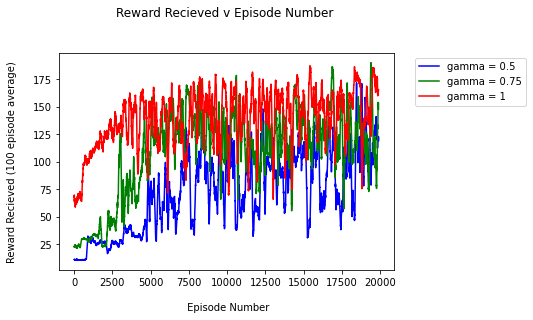

In [12]:
# PLOTTING 

line1, = plt.plot(m_a_reward_1,'b',alpha=1, label = 'gamma = 0.5')
line2, =plt.plot(m_a_reward_2,'g',alpha = 1, label = 'gamma = 0.75')
line3, =plt.plot(m_a_reward_3,'r', alpha = 1, label = 'gamma = 1')
plt.xlabel('\n Episode Number')
plt.ylabel('Reward Recieved (100 episode average)\n')
plt.title('Reward Recieved v Episode Number \n \n')
plt.legend(handles=[line1, line2,line3],bbox_to_anchor=(1.05, 1), loc='upper left',)

plt.show()

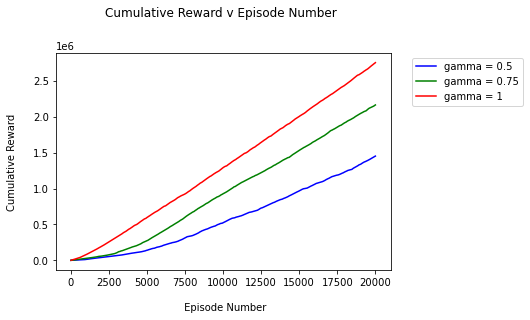

In [13]:
plt.figure()
plt.plot(cum_rew_1,'b', label = 'gamma = 0.5')
plt.plot(cum_rew_2,'g', label = 'gamma = 0.75')
plt.plot(cum_rew_3,'r', label = 'gamma = 1')
plt.xlabel('\n Episode Number')
plt.ylabel('Cumulative Reward\n')
plt.title('Cumulative Reward v Episode Number \n \n')
plt.legend(handles=[line1, line2,line3],bbox_to_anchor=(1.05, 1), loc='upper left',)


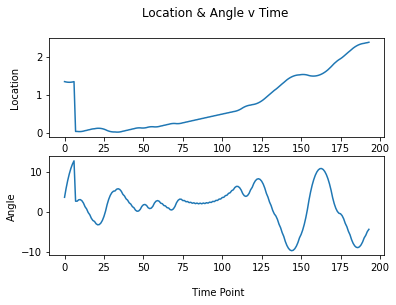

In [51]:
st_pt = np.sum(episode_lengths[0:16006])-40000
end_pt = st_pt + episode_lengths[16006]

observations_trial = observation_ar[np.int(st_pt):np.int(end_pt)]

observations_x = np.zeros(np.int(end_pt)-np.int(st_pt))
observations_t = np.zeros(np.int(end_pt)-np.int(st_pt))
for i in range(0,np.int(end_pt)-np.int(st_pt)):
    observations_x[i] = observations_trial[i][0]
    observations_t[i] = np.degrees(observations_trial[i][2])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(observations_x)
plt.xlabel('\n Time Point')
plt.ylabel('Location\n')
plt.title('Location & Angle v Time \n')
ax2 = plt.subplot(2,1,2)
ax2.plot(observations_t)
plt.xlabel('\n Time Point')
plt.ylabel('Angle')
plt.show()

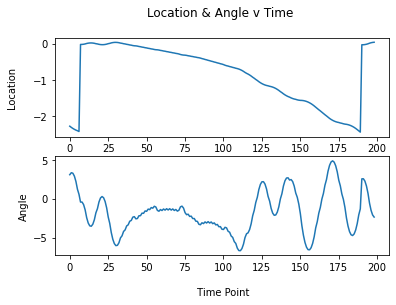

In [52]:
st_pt = np.sum(episode_lengths[0:179])-40000
end_pt = st_pt + episode_lengths[179]

observations_trial = observation_ar[np.int(st_pt):np.int(end_pt)]

observations_x = np.zeros(np.int(end_pt)-np.int(st_pt))
observations_t = np.zeros(np.int(end_pt)-np.int(st_pt))
for i in range(0,np.int(end_pt)-np.int(st_pt)):
    observations_x[i] = observations_trial[i][0]
    observations_t[i] = np.degrees(observations_trial[i][2])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(observations_x)
plt.xlabel('\n Time Point')
plt.ylabel('Location\n')
plt.title('Location & Angle v Time \n')
ax2 = plt.subplot(2,1,2)
ax2.plot(observations_t)
plt.xlabel('\n Time Point')
plt.ylabel('Angle')
plt.show()